In [20]:
import selenium
import time
from bs4 import BeautifulSoup
import requests
from urllib.parse import urljoin
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument("--headless")

In [21]:
url = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Amaruti&sort=bestmatch&serveWarrantyCount=true&gaId=444609335.1720011387&listingSource=TabFilter&storeCityId=2378'

def get_details(soup):
    name = soup.find_all('h3', {'class' : '_11dVb'})
    transmission = soup.find_all('ul', {'_3J2G-'})
    km_driven = soup.find_all('ul', {'_3J2G-'})
    price = soup.find_all('div', {'_2KyOK'})
    
    
    year = []
    make = []
    model = []
    transmissions = []
    kilometers_driven = []
    Fuel = []
    Prices = []
    
    for i in name:
        i=i.get_text()
        year.append(int(i[:4]))
        make.append(i.split(" ")[1])
        name.append(i[5:])
        
        
    for ul in transmission:
        transmissions.append(ul.find_all('li')[-1].get_text())
        
    for ul in km_driven:
        kilometers_driven.append(int(ul.find_all('li')[0].get_text()[:-3].replace(',', '')))
        fuel.append(ul.find_all('li')[2].get_text())
        
        
    for div in price:
        prices.append(int(div.find_all('strong')[0].get_text()[1:].replace(',', '')))
        
        
    return year, make, model, transmissions, kilometers_driven, fuel, prices
        
        
        

In [22]:
def get_details(soup):
    name_elements = soup.find_all('h3', {'class': '_11dVb'})
    transmission_elements = soup.find_all('ul', {'class': '_3J2G-'})
    km_elements = soup.find_all('ul', {'class': '_3J2G-'})
    price_elements = soup.find_all('div', {'class': '_2KyOK'})
    
    # creating empty lists
    year = []
    make = []
    model = []
    transmissions = []
    kilometers_driven = []
    fuel = []
    prices = []
    
    for elem in name_elements:
        text = elem.get_text()
        year.append(int(text[:4]))
        make.append(text.split(" ")[1])
        model.append(" ".join(text.split(" ")[2:]))
        
    for ul in transmission_elements:
        transmissions.append(ul.find_all('li')[-1].get_text())
        
    for ul in km_elements:
        km_text = ul.find_all('li')[0].get_text()[:-3].replace(',', '')
        kilometers_driven.append(int(km_text))
        fuel.append(ul.find_all('li')[2].get_text())
        
    for div in price_elements:
        price_text = div.find_all('strong')[0].get_text()[1:].replace(',', '')
        if 'Lakh' in price_text:
            price_value = float(price_text.replace(' Lakh', '')) * 100000
        else:
            price_value = float(price_text)
        prices.append(int(price_value))
        
    return year, make, model, transmissions, kilometers_driven, fuel, prices


In [23]:
def extracting_data(url):
    driver = webdriver.Chrome(options=chrome_options) #  # Initialize the WebDriver
    driver.get(url) # opening the URL
    time.sleep(2)  #allow 2 seconds for the webpage to open
    scroll_pause_time = 0.5  # Pauses the scroll for 0.5 seconds 
    screen_height = driver.execute_script("return window.screen.height;")  #get the screen height of the web
    i = 1 # Initializing I as one
    
    while True:
        #Scroll one screen heigth each time 
        driver.execute_script(f"window.scrollTo(0, {screen_height}*{i});".format(screen_height = screen_height, i=i))
        i += 1  # incrementing the scroll by 1 for each iteration
        time.sleep(scroll_pause_time)
        # update scroll height each time after scrolled as the scroll height can change after we scroll the page
        scroll_height = driver.execute_script("return document.body.scrollHeight;")
        # break the loop when the height we need to scroll to is larger the the screen height
        if (screen_height) * i > scroll_height:
            break
            
    # Parse the page source with BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    
    year, make, model, transmissions, kilometers_driven, fuel, prices = get_details(soup)
    
    
    # creating data frame
    df = pd.DataFrame({
        'Year of manufacture': year,
        'Make': make,
        'Model': model,
        'Transmission type': transmissions,
        'Km driven': kilometers_driven,
        'Fuel type': fuel,
        'Price (in Rs)': prices
    })
    
    return df
        
        

In [24]:
df = extracting_data(url)

In [25]:
df

,Year of manufacture,Make,Model,Transmission type,Km driven,Fuel type,Price (in Rs)
0,2017,Maruti,Swift Dzire ZXI,Manual,36953,Petrol,490000
1,2018,Maruti,Dzire VXI AMT,Automatic,51852,Petrol,574000
2,2014,Maruti,Swift Dzire ZDI,Manual,11144,Diesel,613000
3,2012,Maruti,Wagon R 1.0 VXI,Manual,42425,Petrol,238000
4,2015,Maruti,Wagon R 1.0 LXI CNG,Manual,79837,CNG,364000
...,...,...,...,...,...,...,...
207,2023,Maruti,New Wagon-R LXI 1.0,Manual,1958,Petrol,589000
208,2020,Maruti,New Wagon-R ZXI 1.2 AMT,Automatic,24495,Petrol,549000
209,2022,Maruti,New Wagon-R LXI CNG 1.0,Manual,33292,CNG,639000
210,2019,Maruti,Baleno ALPHA CVT PETROL 1.2,Automatic,48669,Petrol,665000


In [1]:
# df.to_csv('cars24.csv')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('cars24.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           206 non-null    int64 
 1   Year of manufacture  206 non-null    int64 
 2   Make                 206 non-null    object
 3   Model                206 non-null    object
 4   Transmission type    206 non-null    object
 5   Km driven            206 non-null    int64 
 6   Fuel type            206 non-null    object
 7   Price (in Rs)        206 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 13.0+ KB


In [5]:
data.drop(columns=['Unnamed: 0'], inplace = True)

In [6]:
data

,Year of manufacture,Make,Model,Transmission type,Km driven,Fuel type,Price (in Rs)
0,2017,Maruti,Swift Dzire ZXI,Manual,36953,Petrol,490000
1,2014,Maruti,Ertiga VXI CNG,Manual,70348,CNG,620000
2,2018,Maruti,Dzire VXI AMT,Automatic,51852,Petrol,574000
3,2014,Maruti,Swift Dzire ZDI,Manual,11144,Diesel,613000
4,2012,Maruti,Wagon R 1.0 VXI,Manual,42425,Petrol,238000
...,...,...,...,...,...,...,...
201,2014,Maruti,Ertiga VXI,Manual,65000,Petrol,535000
202,2021,Maruti,Celerio ZXI (O),Manual,23012,Petrol,501999
203,2023,Maruti,New Wagon-R LXI 1.0,Manual,1958,Petrol,589000
204,2020,Maruti,New Wagon-R ZXI 1.2 AMT,Automatic,24495,Petrol,549000


In [7]:
print(data.isnull().sum())

Year of manufacture    0
Make                   0
Model                  0
Transmission type      0
Km driven              0
Fuel type              0
Price (in Rs)          0
dtype: int64


In [8]:
 # adding a feature of car age into the data
current_year = 2024  # Assuming the current year is 2024
data['Car Age'] = current_year - data['Year of manufacture']

In [9]:
data

,Year of manufacture,Make,Model,Transmission type,Km driven,Fuel type,Price (in Rs),Car Age
0,2017,Maruti,Swift Dzire ZXI,Manual,36953,Petrol,490000,7
1,2014,Maruti,Ertiga VXI CNG,Manual,70348,CNG,620000,10
2,2018,Maruti,Dzire VXI AMT,Automatic,51852,Petrol,574000,6
3,2014,Maruti,Swift Dzire ZDI,Manual,11144,Diesel,613000,10
4,2012,Maruti,Wagon R 1.0 VXI,Manual,42425,Petrol,238000,12
...,...,...,...,...,...,...,...,...
201,2014,Maruti,Ertiga VXI,Manual,65000,Petrol,535000,10
202,2021,Maruti,Celerio ZXI (O),Manual,23012,Petrol,501999,3
203,2023,Maruti,New Wagon-R LXI 1.0,Manual,1958,Petrol,589000,1
204,2020,Maruti,New Wagon-R ZXI 1.2 AMT,Automatic,24495,Petrol,549000,4


In [10]:
data_encoded = pd.get_dummies(data, columns=['Make', 'Model', 'Transmission type', 'Fuel type'], drop_first=True)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_encoded[['Km driven', 'Price (in Rs)']] = scaler.fit_transform(data_encoded[['Km driven', 'Price (in Rs)']])

In [12]:
# Example of outlier handling with IQR
Q1 = data_encoded['Price (in Rs)'].quantile(0.25)
Q3 = data_encoded['Price (in Rs)'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_cleaned = data_encoded[(data_encoded['Price (in Rs)'] >= Q1 - 1.5 * IQR) & (data_encoded['Price (in Rs)'] <= Q3 + 1.5 * IQR)]


In [13]:
data_cleaned

,Year of manufacture,Km driven,Price (in Rs),Car Age,Model_Alto 800 LXI,Model_Alto 800 LXI CNG,Model_Alto K10 VXI AMT,Model_BREZZA ZXI SMART HYBRID,Model_BREZZA ZXI SMART HYBRID DUAL TONE,Model_Baleno ALPHA CVT PETROL 1.2,...,Model_Vitara Brezza ZDI PLUS DUAL TONE,Model_Wagon R 1.0 LXI,Model_Wagon R 1.0 LXI CNG,Model_Wagon R 1.0 VXI,Model_Wagon R 1.0 VXI AMT,Model_Wagon R Stingray VXI,Model_XL6 ZETA MT,Transmission type_Manual,Fuel type_Diesel,Fuel type_Petrol
0,2017,0.296337,0.308040,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2014,0.579125,0.425474,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2018,0.422501,0.383921,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,0.077787,0.419151,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,2012,0.342674,0.080397,12,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2014,0.533838,0.348690,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
202,2021,0.178285,0.318879,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
203,2023,0.000000,0.397471,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
204,2020,0.190843,0.361337,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
summary_statistics = data.describe()
summary_statistics


,Year of manufacture,Km driven,Price (in Rs),Car Age
count,206.000000,206.000000,2.060000e+02,206.000000
mean,2017.184466,46462.713592,5.173300e+05,6.815534
std,2.849895,25275.610255,1.905970e+05,2.849895
min,2010.000000,1958.000000,1.490000e+05,1.000000
25%,2015.000000,27014.250000,3.927500e+05,4.250000
50%,2017.000000,43323.000000,4.990000e+05,7.000000
75%,2019.750000,65162.000000,6.015000e+05,9.000000
max,2023.000000,120050.000000,1.256000e+06,14.000000


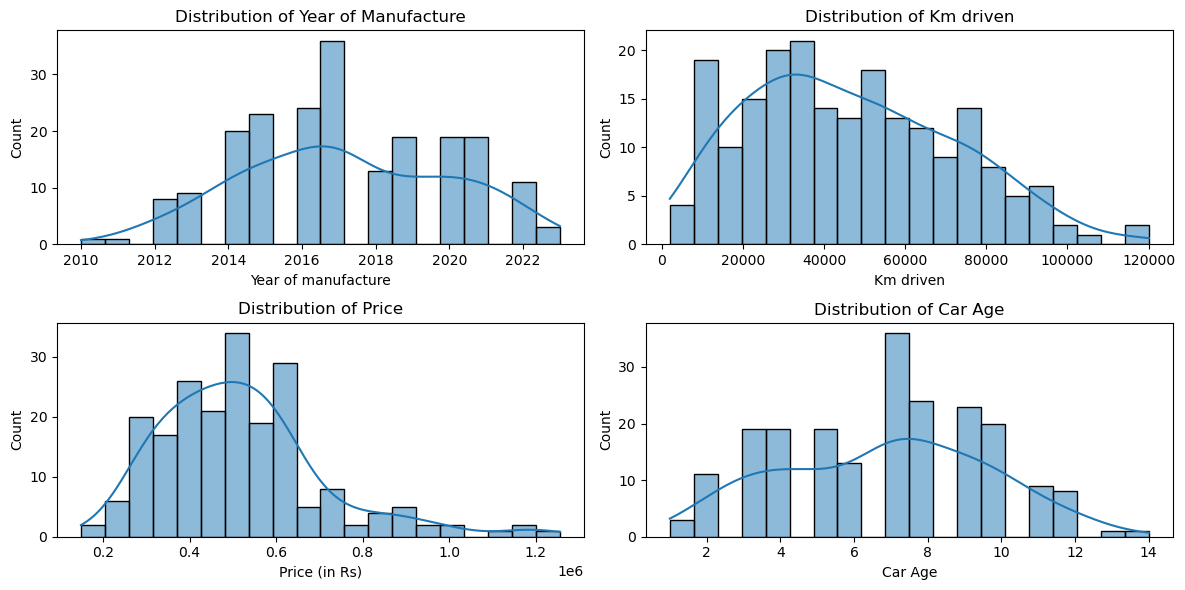

In [15]:
import matplotlib.pyplot as plt

# Distribution plots
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(data['Year of manufacture'], bins=20, kde=True)
plt.title('Distribution of Year of Manufacture')

plt.subplot(2, 2, 2)
sns.histplot(data['Km driven'], bins=20, kde=True)
plt.title('Distribution of Km driven')

plt.subplot(2, 2, 3)
sns.histplot(data['Price (in Rs)'], bins=20, kde=True)
plt.title('Distribution of Price')

plt.subplot(2, 2, 4)
sns.histplot(data['Car Age'], bins=20, kde=True)
plt.title('Distribution of Car Age')

plt.tight_layout()
plt.show()


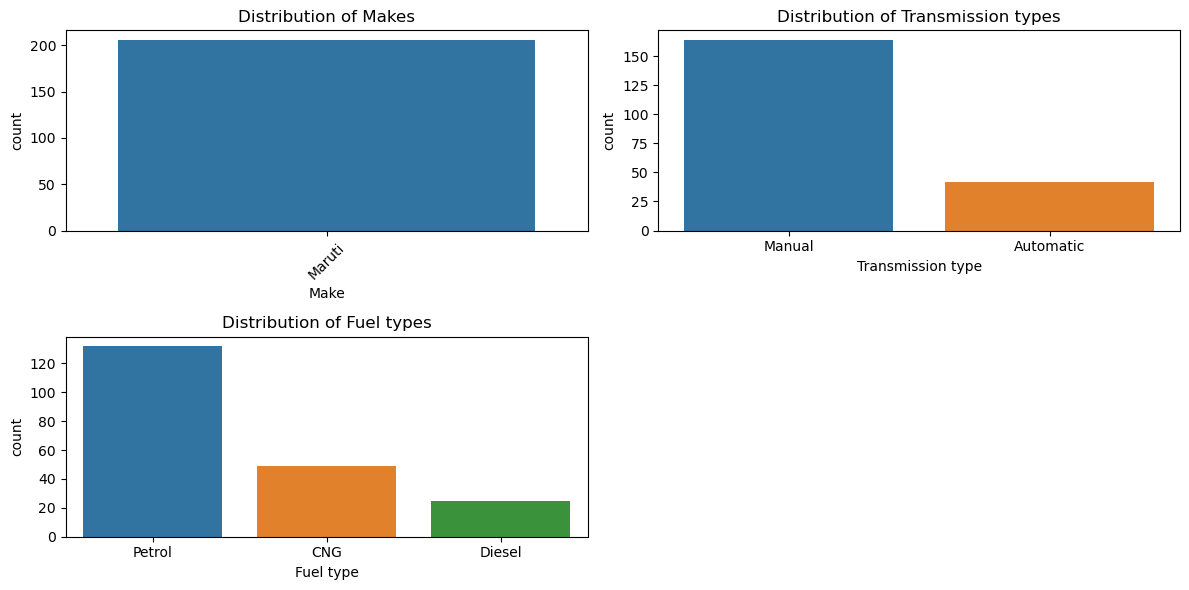

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(data=data, x='Make')
plt.xticks(rotation=45)
plt.title('Distribution of Makes')

plt.subplot(2, 2, 2)
sns.countplot(data=data, x='Transmission type')
plt.title('Distribution of Transmission types')

plt.subplot(2, 2, 3)
sns.countplot(data=data, x='Fuel type')
plt.title('Distribution of Fuel types')

plt.tight_layout()
plt.show()


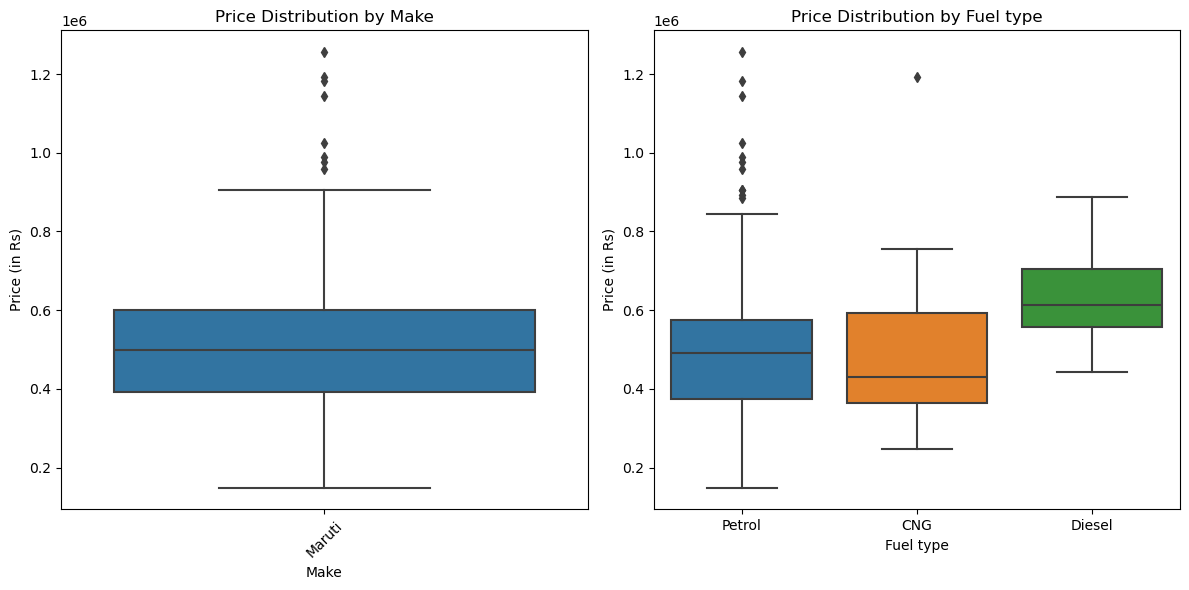

In [17]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Make', y='Price (in Rs)')
plt.xticks(rotation=45)
plt.title('Price Distribution by Make')

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Fuel type', y='Price (in Rs)')
plt.title('Price Distribution by Fuel type')

plt.tight_layout()
plt.show()


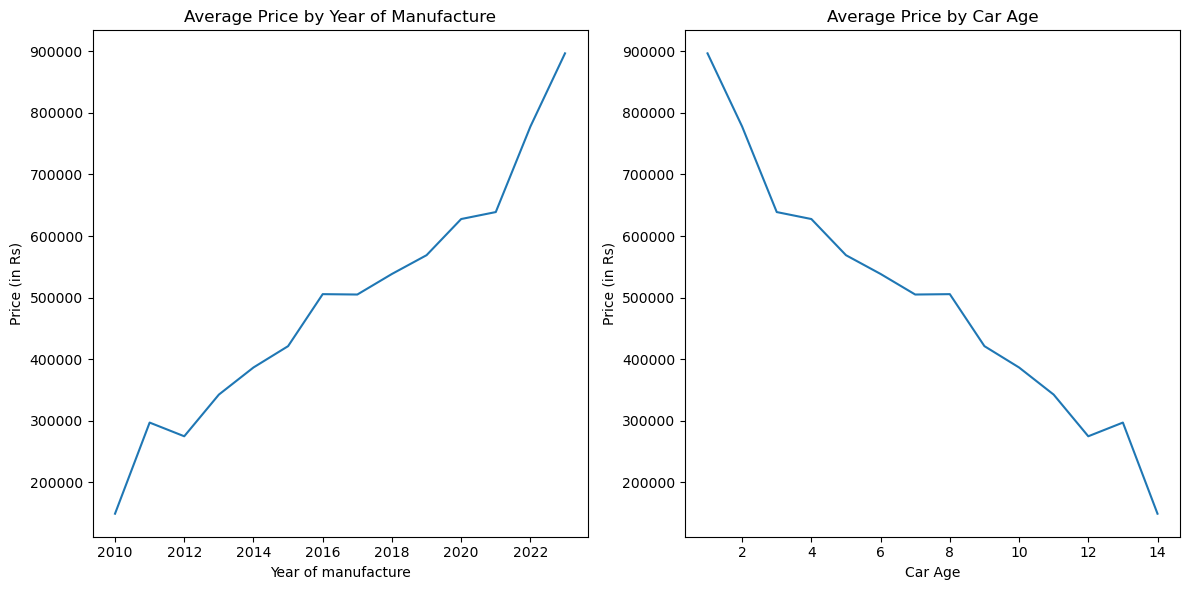

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=data, x='Year of manufacture', y='Price (in Rs)', estimator='mean', errorbar=None)
plt.title('Average Price by Year of Manufacture')

plt.subplot(1, 2, 2)
sns.lineplot(data=data, x='Car Age', y='Price (in Rs)', estimator='mean', errorbar=None)
plt.title('Average Price by Car Age')

plt.tight_layout()
plt.show()


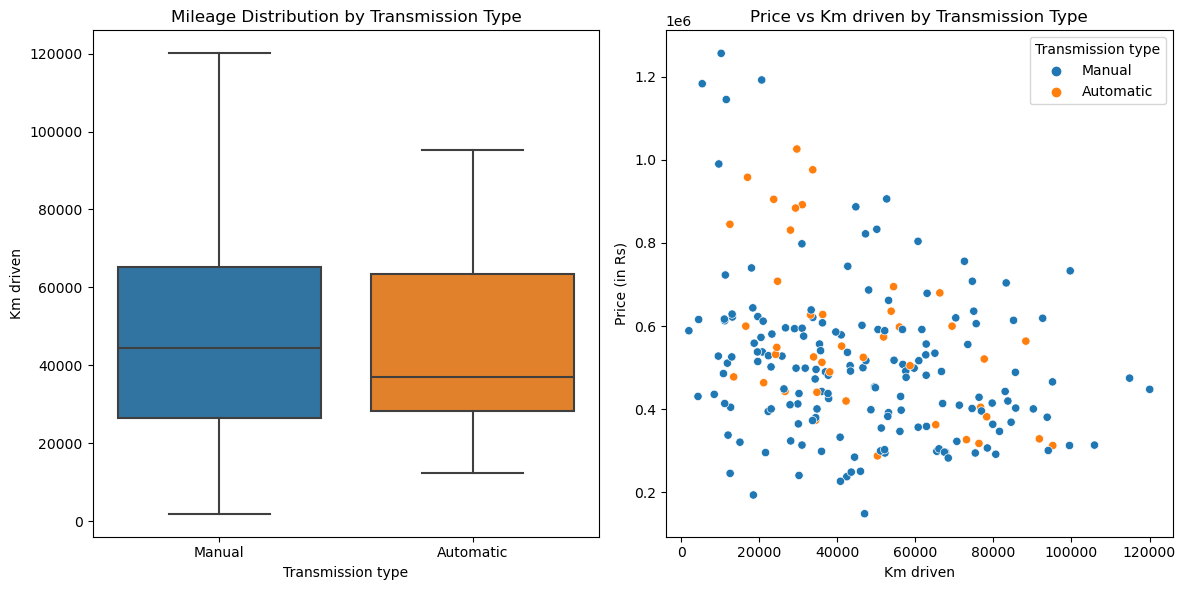

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Transmission type', y='Km driven')
plt.title('Mileage Distribution by Transmission Type')

plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Km driven', y='Price (in Rs)', hue='Transmission type')
plt.title('Price vs Km driven by Transmission Type')

plt.tight_layout()
plt.show()


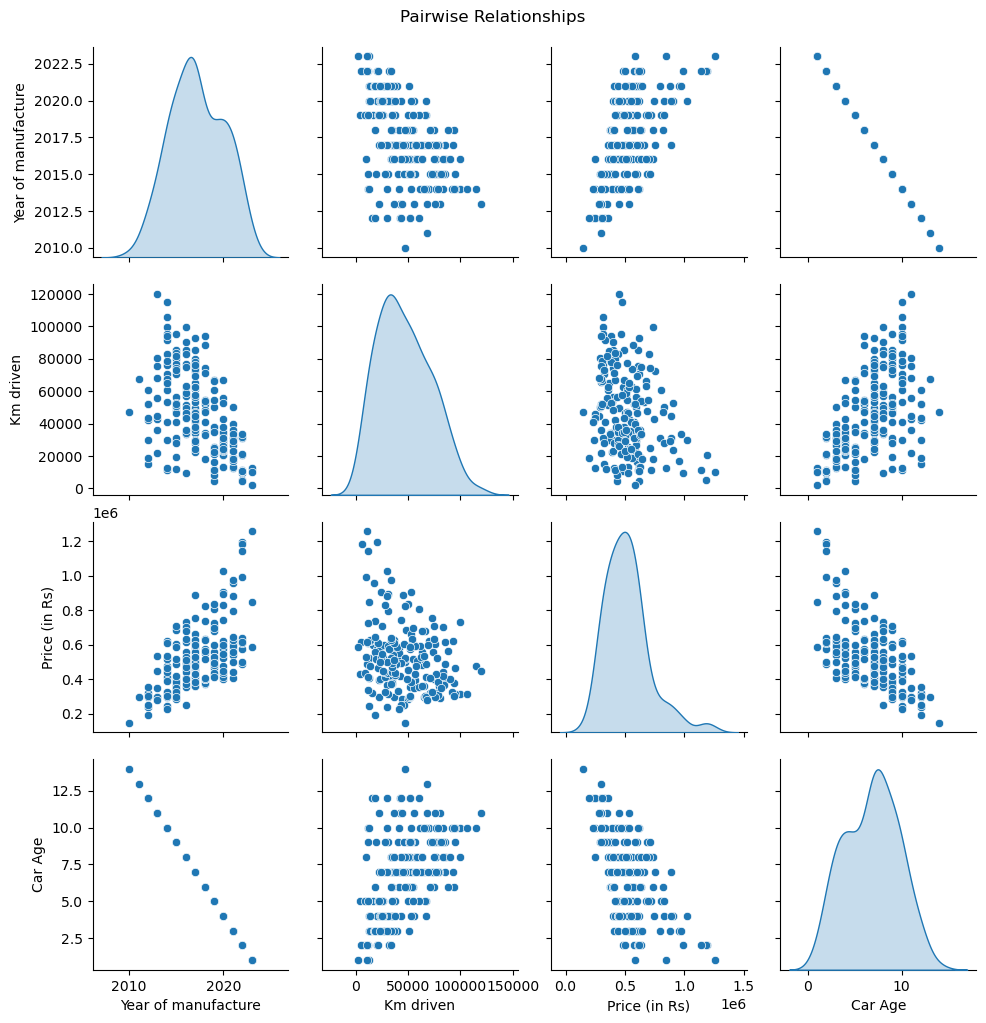

In [20]:
sns.pairplot(data[['Year of manufacture', 'Km driven', 'Price (in Rs)', 'Car Age']], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


# INSIGHTS

Analysis:

Summary Statistics: Use summary_stats to understand typical values and ranges for each numeric variable.

Distribution Plots: From distribution plots, WE observe if there are any outliers or skewed distributions that might affect the analysis.

Correlation Matrix: we Check correlations between variables (Year of manufacture, Km driven, Price (in Rs), Car Age) to identify any significant relationships.

Categorical Variables: Understand the distribution of car Make, Transmission type, and Fuel type to see if there are any predominant categories.

Insights: 

Age and Mileage: Older cars (Year of manufacture and Car Age) tend to have higher mileage (Km driven).

Price Distribution: Price (in Rs) varies widely, likely influenced by factors such as age, mileage, and model.

Popular Models and Types: Identify which car Make, Model, Transmission type, and Fuel type combinations are most common

Price by Make and Fuel Type: Certain car makes and fuel types exhibit higher average prices, suggesting preferences or market demand.

Price Over Time: Generally, newer cars (Year of manufacture) tend to have higher prices, and as cars age (Car Age increases), their prices decrease.

Transmission Type and Mileage: Automatic transmission cars tend to have lower mileage but potentially higher prices compared to manual transmission cars.

Pairwise Relationships: Explore correlations and distributions more visually, identifying potential nonlinear relationships or outliers.